# House_Price_Prediction

# Importing Required Libraries

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#ignore harmless warnings

import warnings
warnings.filterwarnings("ignore")

# set to display all the columns in dataset

pd.set_option("display.max_columns",None)

#to run sql quries on data frame

import pandasql as psql

# Upload the Dataset and Backup

In [2]:
#load data set

data=pd.read_csv(r"C:\Users\hp\Downloads\Housing_Price_Prediction.csv",header=0)

In [3]:
#Display 5 rows od data_set

data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [4]:
#Save the dataset in Backup dataset

data_bk=data.copy()

In [5]:
#Shape of the data set

data.shape

(5000, 7)

In [6]:
#data set description

data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


# Display dataset information

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 254.0+ KB


# Check the null values

In [8]:
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

# Check the duplicates

In [9]:
#Displaying the duplicates

data_dup=data[data.duplicated(keep='last')]
data_dup

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address


In [12]:
#Display columns

data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [14]:
#datatypes

data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

# Counting the values

In [11]:

data['Address'].value_counts()

208 Michael Ferry Apt. 674\nLaurabury, NE 37010-5101             1
314 Christopher Square Apt. 404\nLake Ronaldville, SD 42025      1
21042 Wilson Islands Suite 238\nFischerchester, MP 42425-4129    1
Unit 8831 Box 5748\nDPO AE 73012-7314                            1
481 Kaitlin Mission Apt. 309\nJodystad, IA 16947                 1
                                                                ..
054 Carter Crescent Suite 674\nGlennport, WA 11140               1
8460 Kathleen Mission Apt. 482\nPort Amytown, KY 72016           1
3737 Hartman Rue\nReneestad, ID 69250-7718                       1
3465 Latoya Well\nNelsonmouth, MI 55741-4287                     1
37778 George Ridges Apt. 509\nEast Holly, NV 29290-3595          1
Name: Address, Length: 5000, dtype: int64

# Encoding Techniques

In [12]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

data['Address'] = label_encoder.fit_transform(data['Address'])

In [13]:
#Identify the variables to normalize with minmaxscalar

cols=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']

In [14]:
cols

['Avg. Area Income',
 'Avg. Area House Age',
 'Avg. Area Number of Rooms',
 'Avg. Area Number of Bedrooms',
 'Area Population']

In [15]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,962
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,863
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,4069
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,4794
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,4736


# Drawing the bargraphs for each column

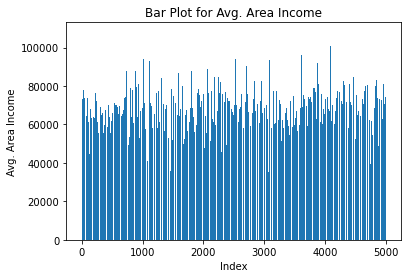

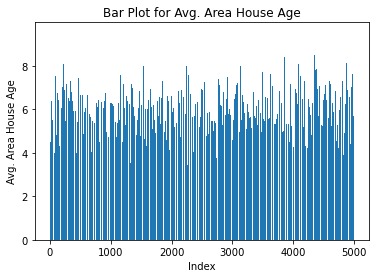

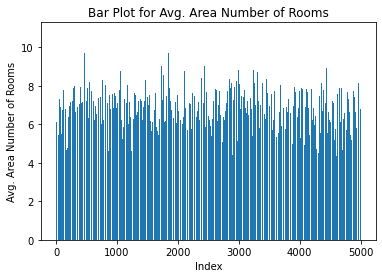

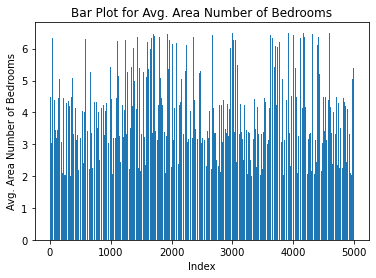

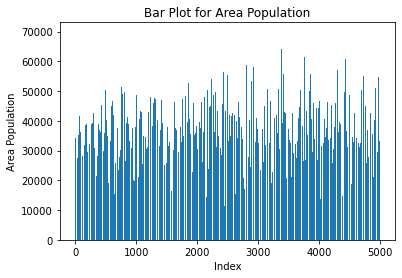

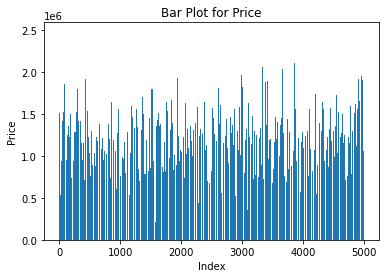

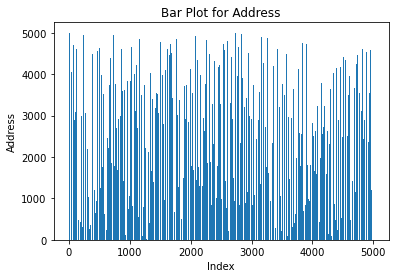

In [16]:
# Assuming you want to create bar plots for all columns (variables) in the dataset
for column in data.columns:
    plt.figure()  # Create a new figure for each plot
    plt.bar(data.index, data[column])
    plt.xlabel('Index')  # You can customize the x-axis label here
    plt.ylabel(column)   # Use the column name as the y-axis label
    plt.title(f'Bar Plot for {column}')  # Set the title for each plot
    plt.show()


# Drawing the piecharts for each column

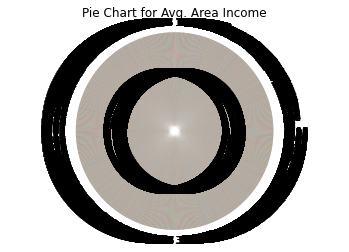

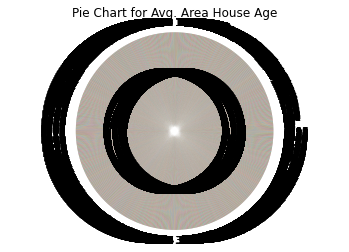

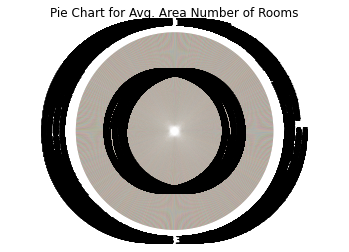

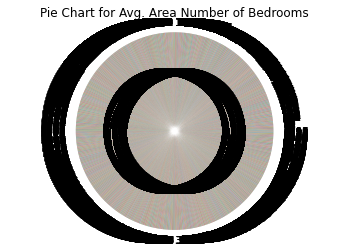

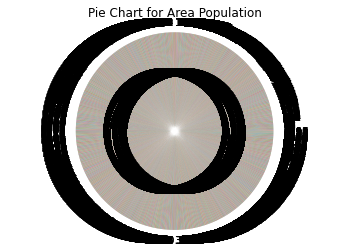

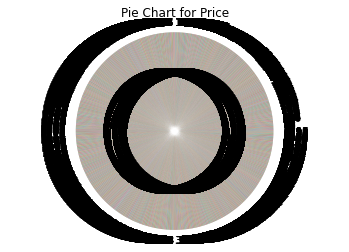

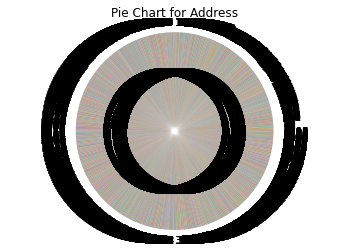

In [17]:
# Assuming you want to create pie charts for all columns (variables) in the dataset
for column in data.columns:
    plt.figure()  # Create a new figure for each plot
    plt.pie(data[column], labels=data.index, autopct='%1.1f%%')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title(f'Pie Chart for {column}')  # Set the title for each plot
    plt.show()

# Confusion Matrix

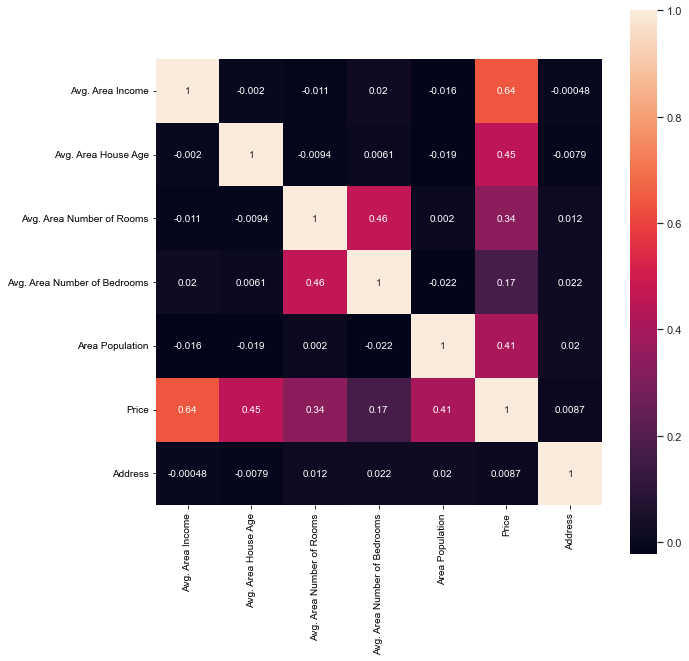

In [18]:
#correlations between the columns (variables) in the DataFrame
#Heat Map

fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

# Define Independent and Dependent variables

In [19]:
#identify the independent and target (dependent) variables

Indepvar=[]
for col in data.columns:
    if col!='Price':
        Indepvar.append(col)
targetvar='Price'
x=data[Indepvar]
y=data[targetvar]

# x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
#                'Avg. Area Number of Bedrooms', 'Area Population']]

# y = data['Price']


In [20]:
# #float->int

# cols1=['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']

# data[cols1]=data[cols1].astype('int')

# Splitting the dataset

In [22]:
# Split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Display the shape for train & test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape


((3500, 6), (1500, 6), (3500,), (1500,))

In [23]:
#Normalize

from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0 , 1))

x_train[cols]=mmscaler.fit_transform(x_train[cols])
x_train=pd.DataFrame(x_train)

x_test[cols]=mmscaler.fit_transform(x_test[cols])
x_test=pd.DataFrame(x_test)

# Linear Regression Algoritm

In [24]:
from sklearn.linear_model import LinearRegression

from sklearn import metrics

# Create an object for the Linear Regression model
ModelLR = LinearRegression()

# Train the model
ModelLR.fit(x_train, y_train)

LinearRegression()

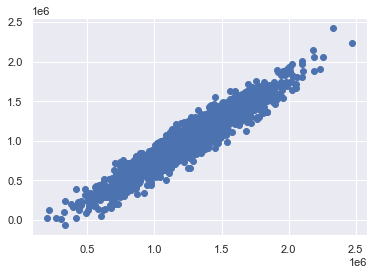

In [25]:
#Predict the model with text data set

y_pred = ModelLR.predict(x_test)

#create a scatter plot to visualize the actual target values against the predicted target values.

plt.scatter(y_test,y_pred)

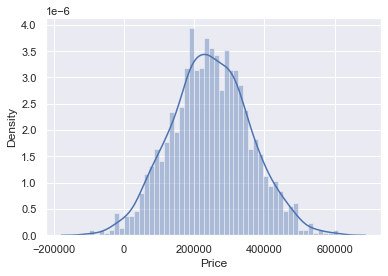

In [26]:
sns.distplot((y_test-y_pred),bins=50);

In [27]:
#Regression Evaluation Metrics

# MAE(Mean Absolute Error)
print("Mean Absolute Error     : ", metrics.mean_absolute_error(y_test, y_pred))

# MSE(Mean Squared Error)
print("Mean Squared Error      : ", metrics.mean_squared_error(y_test, y_pred))

# RMSE(Root Mean Squared Error)
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#R2 Score
print("R2 Score                : ", metrics.r2_score(y_test, y_pred))


print('-----------------------------------------------------------------------------------------------------')

Mean Absolute Error     :  246996.2922640381
Mean Squared Error      :  73160459813.66621
Root Mean Squared Error :  270481.9029319082
R2 Score                :  0.3800503443611881
-----------------------------------------------------------------------------------------------------
